<a href="https://colab.research.google.com/github/ayushabhinav/TechGig/blob/main/NewYearResolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
os.listdir('/content/drive/MyDrive/NewYearResolutionDataset')

['test.csv',
 'train.csv',
 'sample-submission.csv',
 'NewYearResolution.ipynb',
 'my_sub.csv',
 'NYR.csv',
 'NewYearResolution_NN.ipynb']

In [5]:
base_folder = '/content/drive/MyDrive/NewYearResolutionDataset'
test_file = os.path.join(base_folder, 'test.csv')
train_file = os.path.join(base_folder, 'train.csv')

#### Load and Analyse the train data

In [6]:
train_data = pd.read_csv(train_file)
train_data.head()

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,male,total_household_size,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual_credit_score,total_sales
0,247,1,LIMA,OH,45804,TRAVEL/TRANSPORTATION/HOSPITALITY,44.01,43.68,35.41,53.37,46.63,2.24,63860000,EST,40.704283,-84.147047,E,70,B,80 TO 84,80,4070
1,253,4,VACAVILLE,CA,95687,AT-WORK,38.36,41.31,26.48,54.00,46.00,2.54,92764000,PST,38.354860,-121.950360,D,35,A,90 TO 94,91,4323
2,265,4,CINCINNATI,OH,45219,EDUCATIONAL,28.81,17.22,43.06,45.56,54.44,1.90,51027000,EST,39.136100,-84.504288,C,13,A+,95 TO 100,97,2163
3,267,1,GLASGOW,KY,42141,AT-WORK,42.89,38.49,44.00,52.41,47.59,2.24,47119000,CST,37.010838,-85.903418,A,3,B+,85 TO 89,86,528
4,276,1,BOWLING GREEN,KY,42101,EATING & DRINKING,38.82,60.82,26.24,54.18,45.82,1.93,47941000,CST,36.964703,-86.436535,A,3,P,PROFESSIONAL INDIVIDUAL,78,528


In [7]:
test_data = pd.read_csv(test_file)
test_data.head()

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,male,total_household_size,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual _credit_score
0,1001,1,HOUSTON,TX,77057,AT-WORK,33.96,22.42,44.74,50.76,49.24,1.58,74121000,CST,29.749850,-95.482657,D,41,A+,95 TO 100,95
1,1002,1,RAPID CITY,SD,57702,AT-WORK,37.34,42.41,34.52,50.06,49.94,1.99,45196000,MST,44.079441,-103.262005,A,4,A+,95 TO 100,96
2,1003,1,CLARKSVILLE,AR,72830,AT-WORK,36.06,54.47,33.87,50.46,49.54,2.58,47034000,CST,35.482303,-93.476899,A,4,A+,95 TO 100,96
3,1004,1,RAPID CITY,SD,57702,THIRD PARTY (NON-CONSUMER),37.34,42.41,34.52,50.06,49.94,1.99,45196000,MST,44.082562,-103.263440,B,5,B+,85 TO 89,89
4,1005,1,CLARKSVILLE,AR,72830,ENTERTAINMENT/RECREATION/LEISURE,33.64,50.70,34.93,51.30,48.70,2.56,45592000,CST,35.472011,-93.482870,B,5,A+,95 TO 100,96


In [8]:
train_data.shape

(344, 22)

In [9]:
train_data.describe()

,outlet_no,business_type,zip,avg_age,blue_collar,white_collar,female,male,total_household_size,total_household_income,latitude,longitude,employee_size,actual_credit_score,total_sales
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,3.440000e+02,344.000000,344.000000,344.000000,344.000000,3.440000e+02
mean,551.049419,1.279070,52324.691860,40.166395,38.250930,39.269448,52.429041,47.571017,2.286715,6.209274e+07,36.990696,-91.031090,164.654070,89.668605,1.938712e+04
std,174.709306,0.872664,25348.887511,8.735648,16.672136,12.423702,6.056760,6.056753,0.550595,3.023098e+07,5.313465,12.600138,712.844468,7.091699,9.650131e+04
min,247.000000,1.000000,10032.000000,19.670000,0.000000,0.000000,0.200000,29.080000,0.000000,1.605400e+07,26.158701,-122.742054,3.000000,67.000000,4.140000e+02
25%,407.500000,1.000000,33632.500000,34.620000,25.575000,31.017500,50.642500,45.480000,1.930000,4.072800e+07,32.802480,-98.208423,4.000000,85.000000,5.627500e+02
50%,550.500000,1.000000,46845.000000,39.170000,37.480000,38.605000,52.480000,47.520000,2.270000,5.516400e+07,38.563427,-86.719241,15.000000,91.000000,1.738500e+03
75%,700.750000,1.000000,77165.000000,44.027500,49.162500,46.367500,54.520000,49.357500,2.570000,7.542600e+07,40.700441,-81.908571,70.000000,95.000000,5.473750e+03
max,845.000000,4.000000,98370.000000,80.120000,78.640000,100.000000,70.920000,99.800000,4.080000,2.218590e+08,47.738760,-73.801880,10000.000000,100.000000,1.424392e+06


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   outlet_no               344 non-null    int64  
 1   business_type           344 non-null    int64  
 2   city                    344 non-null    object 
 3   state                   344 non-null    object 
 4   zip                     344 non-null    int64  
 5   store_location          344 non-null    object 
 6   avg_age                 344 non-null    float64
 7   blue_collar             344 non-null    float64
 8   white_collar            344 non-null    float64
 9   female                  344 non-null    float64
 10  male                    344 non-null    float64
 11  total_household_size    344 non-null    float64
 12  total_household_income  344 non-null    int64  
 13  time_zone               344 non-null    object 
 14  latitude                344 non-null    fl

#### Perform EDA

<Axes: xlabel='total_sales'>

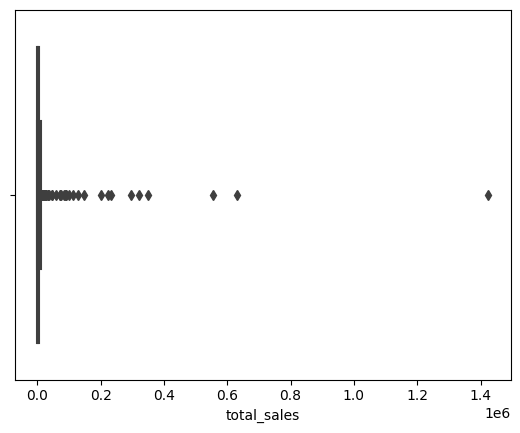

In [11]:
sns.boxplot(data = train_data, x='total_sales')
# Data has outlier

In [12]:
#Top three outlier
train_data.total_sales.sort_values(ascending=False)[:15]

119    1424392
298     629829
304     556016
327     350909
63      321475
311     294789
40      232757
325     222451
173     201471
217     146302
171     128139
321     112633
138     100582
236      91438
302      90388
Name: total_sales, dtype: int64

In [13]:
filt = train_data.total_sales >= 100000
train_data_1 = train_data[~filt]

In [14]:
train_data[filt]

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,male,total_household_size,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual_credit_score,total_sales
40,486,1,ATLANTA,GA,30329,THIRD PARTY (NON-CONSUMER),26.93,17.56,52.17,51.76,48.24,1.30,32375000,EST,33.798466,-84.325840,I,1501,A+,95 TO 100,99,232757
63,590,1,SAN ANTONIO,TX,78229,AT-WORK,45.98,22.41,45.44,46.41,53.59,1.56,45403000,CST,29.507370,-98.577917,J,5001,B+,85 TO 89,88,321475
119,841,1,BETHLEHEM,PA,18017,AT-WORK,62.34,31.17,44.72,61.98,38.02,1.33,29932000,EST,40.644637,-75.407893,K,10000,C+,75 TO 79,78,1424392
138,356,1,GARDEN GROVE,CA,92843,THIRD PARTY (NON-CONSUMER),40.04,37.09,46.68,50.09,49.91,3.09,65068000,PST,33.775109,-117.913168,H,550,A+,95 TO 100,100,100582
171,522,1,OCONOMOWOC,IL,53066,THIRD PARTY (NON-CONSUMER),40.00,42.16,28.60,51.06,48.94,2.29,97956000,CST,43.100129,-88.486611,H,920,B+,85 TO 89,86,128139
173,529,1,SYRACUSE,NY,13205,AT-WORK,61.28,30.31,41.50,55.39,44.61,1.21,23686000,EST,43.009006,-76.133864,I,2400,A+,95 TO 100,96,201471
217,788,1,POWAY,CA,92064,AT-WORK,48.58,16.39,47.92,54.36,45.64,2.38,96202000,PST,32.997136,-117.055791,H,800,B+,85 TO 89,88,146302
298,582,1,PHOENIX,AZ,85006,AT-WORK,34.70,78.36,26.39,46.62,53.38,2.49,24886000,MST,33.465674,-112.058792,I,3800,A+,95 TO 100,100,629829
304,621,1,FORT WAYNE,IN,46845,AT-WORK,35.05,20.72,51.14,50.00,50.00,3.03,81782000,EST,41.180940,-85.101941,I,4000,B+,85 TO 89,88,556016
311,678,1,JAMAICA,NY,11432,AT-WORK,38.67,34.45,48.78,51.32,48.68,3.21,90372000,EST,40.717359,-73.803610,I,2000,B+,85 TO 89,86,294789


<Axes: >

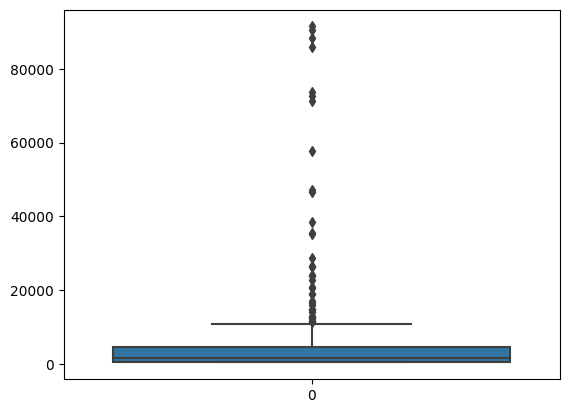

In [15]:
sns.boxplot(train_data_1.total_sales)

<Axes: ylabel='count'>

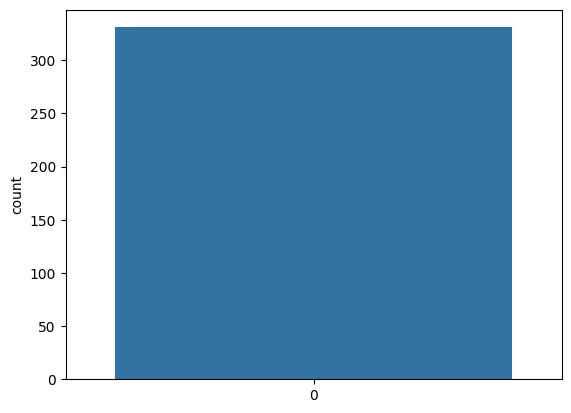

In [16]:
sns.countplot(train_data_1.business_type)

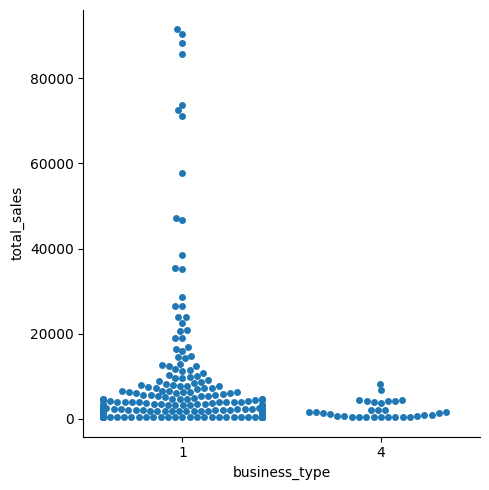

In [17]:
sns.catplot(data=train_data_1, kind="swarm", x="business_type", y="total_sales")

In [18]:
train_data_1.city.value_counts().sort_values(ascending=False)[:15]

SAN ANTONIO         14
SHREVEPORT          10
MCALLEN              9
BETHLEHEM            9
GLASGOW              8
DAYTON               7
PITTSBURGH           7
BOWLING GREEN        7
HOUSTON              6
RAPID CITY           6
OKLAHOMA CITY        6
WEST VALLEY CITY     5
MEADVILLE            5
CINCINNATI           5
SILVER SPRING        5
Name: city, dtype: int64

In [19]:
top_cities = train_data_1.city.value_counts().sort_values(ascending=False)[:15].index
top_cities

Index(['SAN ANTONIO', 'SHREVEPORT', 'MCALLEN', 'BETHLEHEM', 'GLASGOW',
       'DAYTON', 'PITTSBURGH', 'BOWLING GREEN', 'HOUSTON', 'RAPID CITY',
       'OKLAHOMA CITY', 'WEST VALLEY CITY', 'MEADVILLE', 'CINCINNATI',
       'SILVER SPRING'],
      dtype='object')

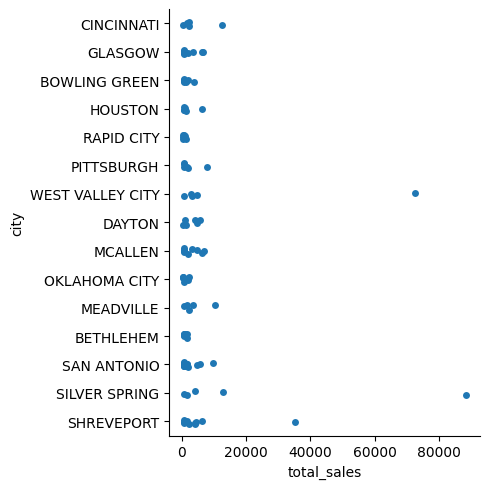

In [20]:
top_city_data = train_data_1[train_data_1.apply(lambda x:x.city in top_cities, axis='columns')]

sns.catplot(data=top_city_data, y='city', x='total_sales', )

In [21]:
train_data_1.store_location.value_counts()      

AT-WORK                              168
THIRD PARTY (NON-CONSUMER)           106
EATING & DRINKING                     29
OTHER SHOPPING & SERVICES             12
TRAVEL/TRANSPORTATION/HOSPITALITY      6
EDUCATIONAL                            6
ENTERTAINMENT/RECREATION/LEISURE       3
GROCERY SHOPPING                       1
Name: store_location, dtype: int64

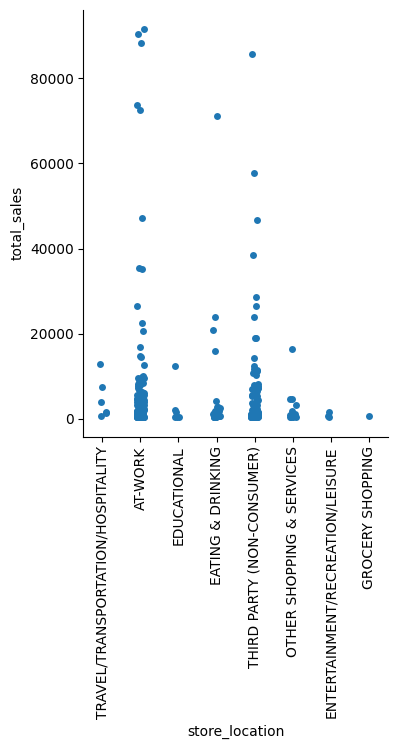

In [22]:
sns.catplot(data=train_data_1, x='store_location', y='total_sales')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='avg_age', ylabel='total_sales'>

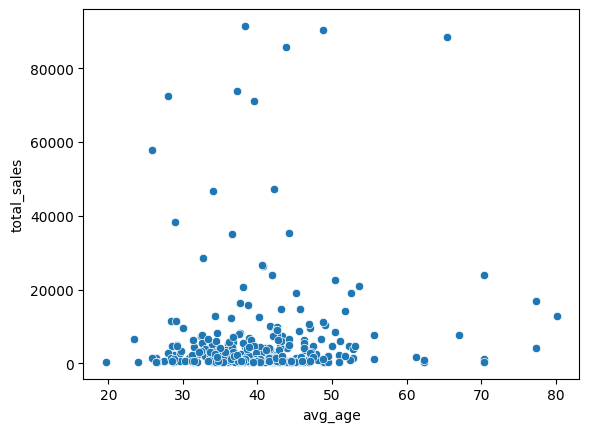

In [23]:
sns.scatterplot(data=train_data_1, x='avg_age', y='total_sales')              

<Axes: xlabel='blue_collar', ylabel='Count'>

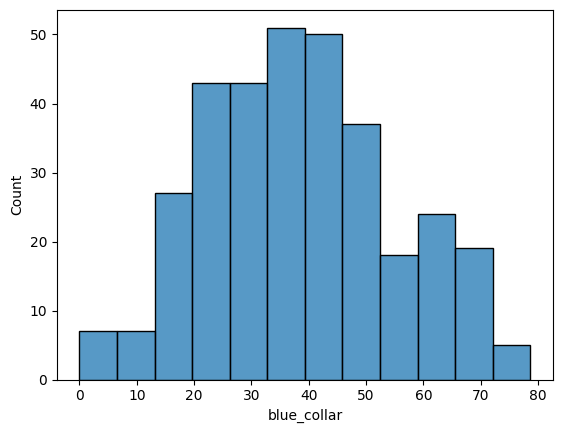

In [24]:
sns.histplot(train_data_1.blue_collar)

<Axes: xlabel='blue_collar', ylabel='total_sales'>

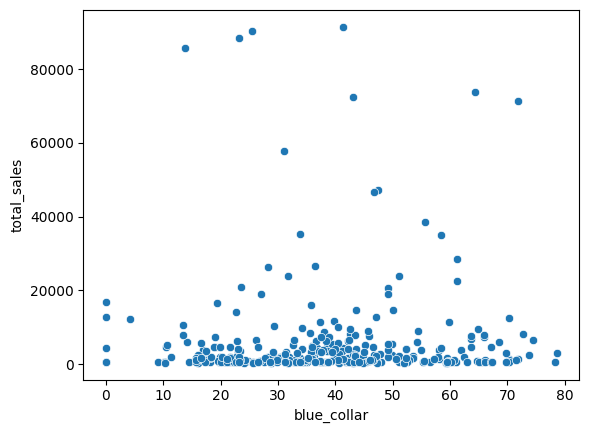

In [25]:
sns.scatterplot(data=train_data_1, x='blue_collar', y='total_sales')   

<Axes: xlabel='white_collar', ylabel='Count'>

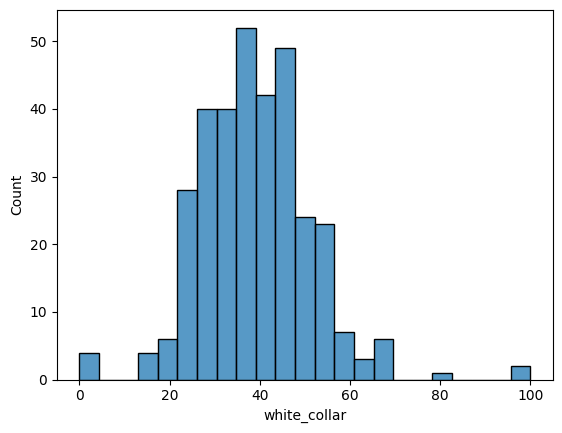

In [26]:
sns.histplot(train_data_1.white_collar)

<Axes: xlabel='white_collar', ylabel='total_sales'>

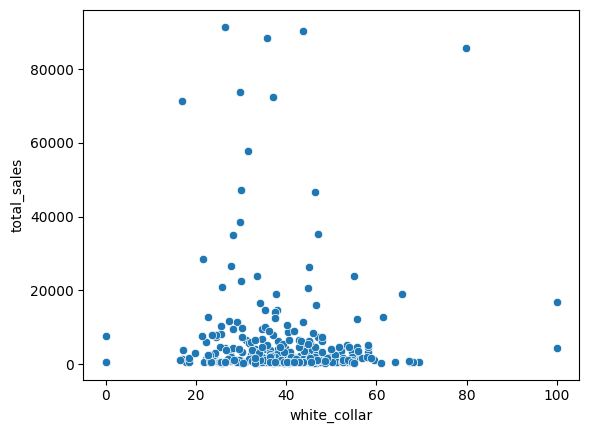

In [27]:
sns.scatterplot(data=train_data_1, x='white_collar', y='total_sales')  

<Axes: xlabel='male', ylabel='Count'>

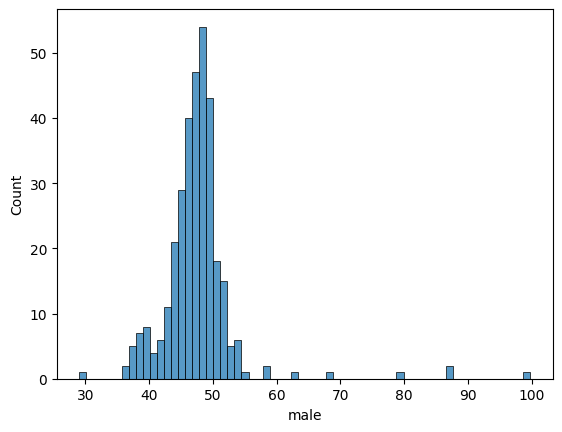

In [28]:
sns.histplot(train_data_1.male)

<Axes: xlabel='male', ylabel='total_sales'>

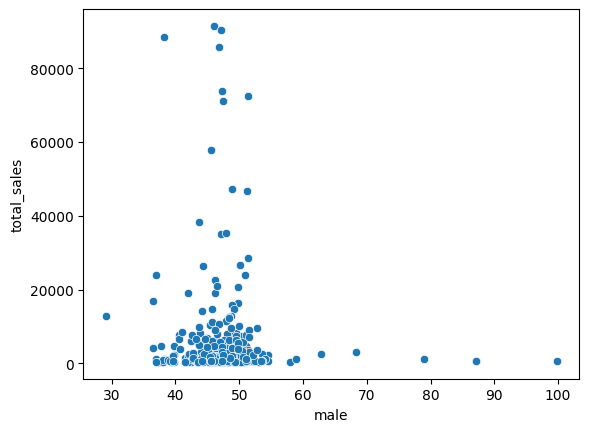

In [29]:
sns.scatterplot(data=train_data_1, x='male', y='total_sales')  

<Axes: xlabel='female', ylabel='Count'>

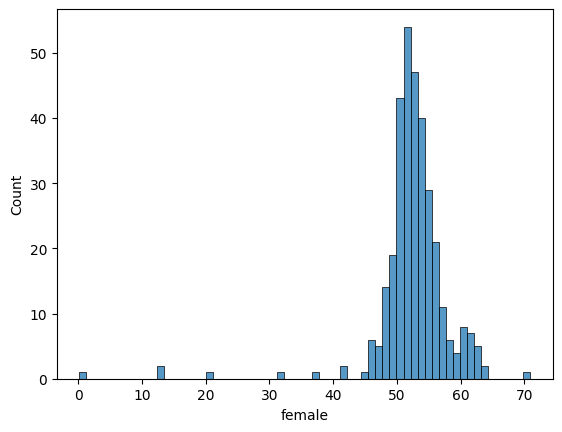

In [30]:
sns.histplot(train_data_1.female)

<Axes: xlabel='female', ylabel='total_sales'>

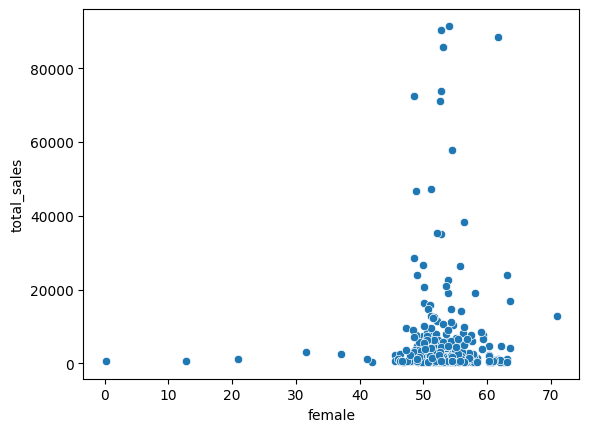

In [31]:
sns.scatterplot(data=train_data_1, x='female', y='total_sales') 

<Axes: >

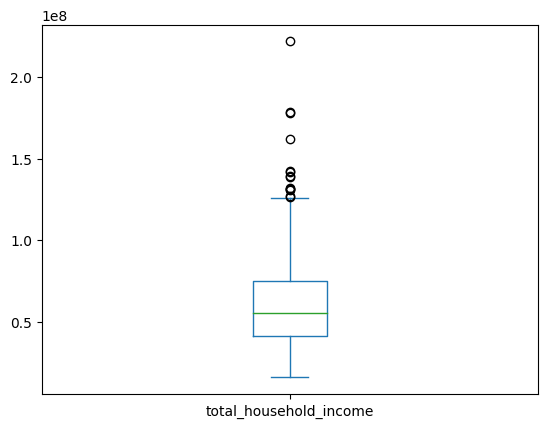

In [32]:
train_data_1['total_household_income'].plot(kind='box')

<Axes: xlabel='total_household_income', ylabel='total_sales'>

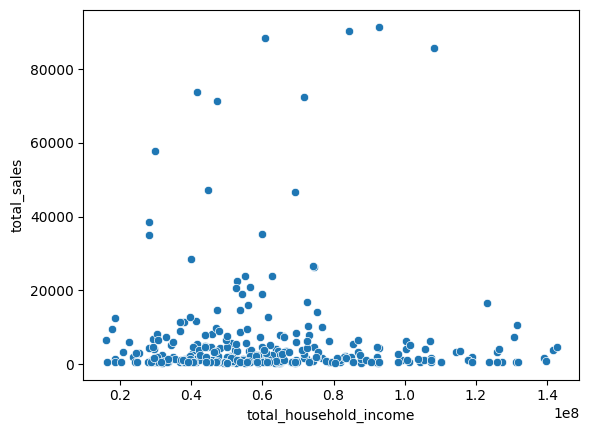

In [33]:
sns.scatterplot(data=train_data_1[train_data_1.total_household_income < 1.5 * 10**8], x='total_household_income', y='total_sales') 

<Axes: xlabel='employee_size', ylabel='Count'>

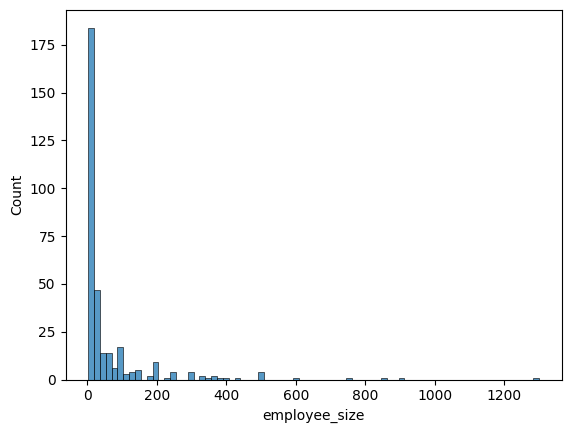

In [34]:
sns.histplot(train_data_1.employee_size)

<Axes: >

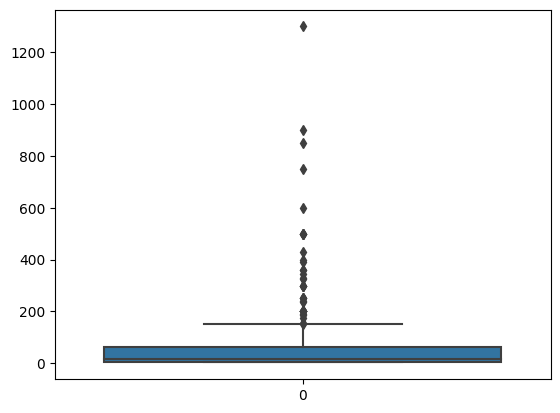

In [35]:
sns.boxplot(train_data_1.employee_size)

<Axes: xlabel='employee_size', ylabel='total_sales'>

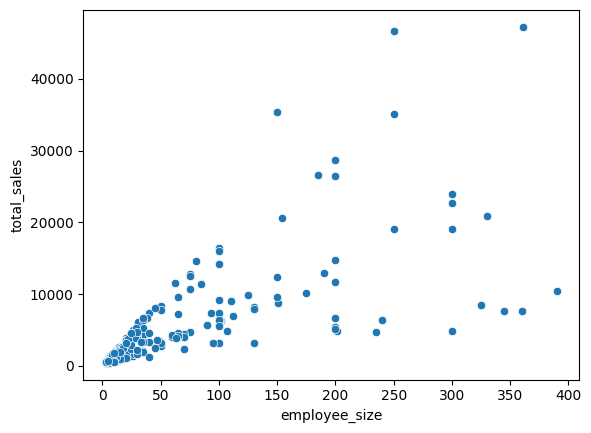

In [36]:
sns.scatterplot(data=train_data_1[train_data_1.employee_size < 400], x='employee_size', y='total_sales') 

In [37]:
train_data_1.credit_score

0       B
1       A
2      A+
3      B+
4       P
5       A
6      B+
7      B+
8       A
9      B+
10     A+
11     A+
12      A
13     A+
14     C+
15     B+
16     A+
17      B
18      A
19      A
20      A
21      A
22     C+
23     C+
24      A
25      A
26     B+
27     A+
28     A+
29      A
30     B+
31      B
32     A+
33     B+
34      A
35      A
36     A+
37     A+
38     B+
39      I
41     B+
42     A+
43     A+
44     A+
45      A
46     A+
47     A+
48     A+
49     B+
50      B
51     A+
52      A
53      A
54     A+
55     B+
56      A
57      A
58     B+
59     C+
60     B+
61     C+
62      A
64     A+
65     B+
66      B
67     B+
68     B+
69     B+
70     A+
71      A
72     A+
73     C+
74      B
75     B+
76      B
77      B
78     C+
79     B+
80      B
81      B
82     A+
83      A
84      A
85     B+
86     A+
87     B+
88     B+
89     B+
90     B+
91     B+
92      A
93      A
94      A
95      A
96      B
97      P
98      B
99     A+
100    A+
101    A+


<Axes: xlabel='credit_score', ylabel='count'>

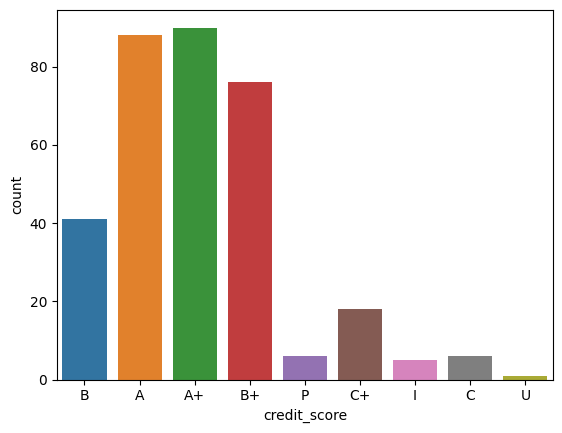

In [38]:
sns.countplot(data=train_data_1, x='credit_score')

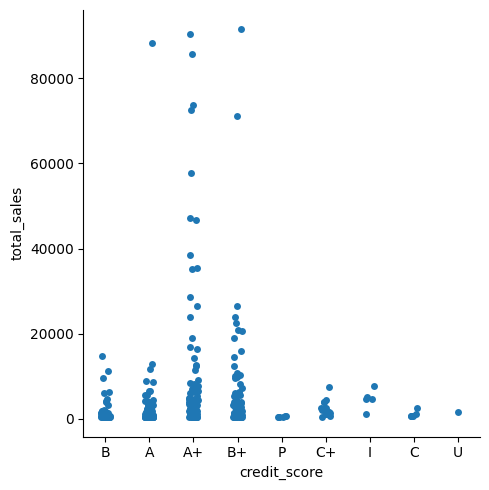

In [39]:
sns.catplot(data=train_data_1, x='credit_score', y='total_sales')

#### Feature Engineering

##### Remove outliers
  - Where total sales is  very high
  - employee_size
  - total_household_income

<Axes: >

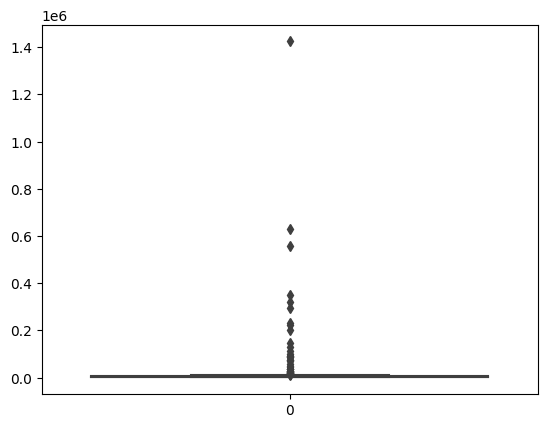

In [40]:
sns.boxplot(train_data.total_sales)

In [41]:
train_data.total_sales.sort_values(ascending=False)[:15]

119    1424392
298     629829
304     556016
327     350909
63      321475
311     294789
40      232757
325     222451
173     201471
217     146302
171     128139
321     112633
138     100582
236      91438
302      90388
Name: total_sales, dtype: int64

In [42]:
max_total_sales = 556016

<Axes: >

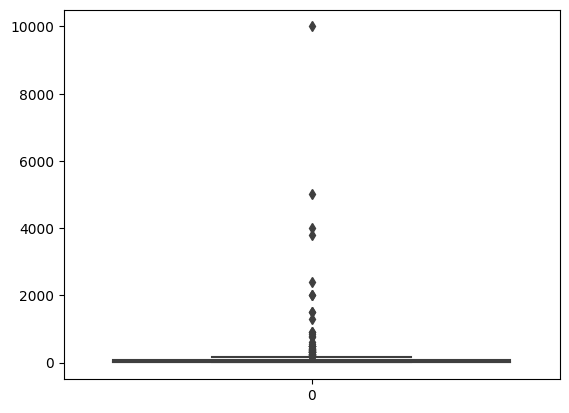

In [43]:
sns.boxplot(train_data.employee_size)

In [44]:
train_data.employee_size.sort_values(ascending=False)[:10]

119    10000
63      5001
304     4000
298     3800
173     2400
311     2000
327     2000
40      1501
325     1500
165     1300
Name: employee_size, dtype: int64

In [45]:
max_employee_size = 5001

<Axes: >

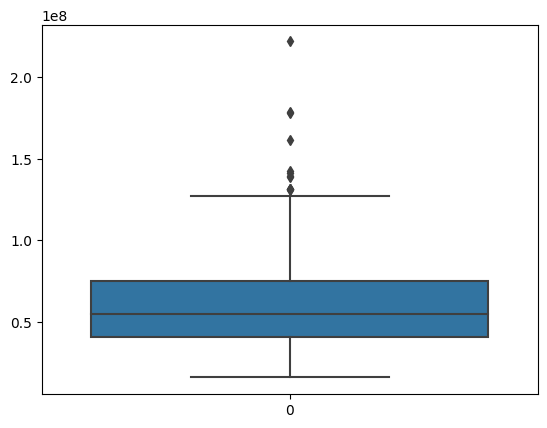

In [46]:
sns.boxplot(train_data.total_household_income)

In [47]:
train_data.total_household_income.sort_values(ascending=False)[:10]

340    221859000
150    178569000
188    177903000
117    161784000
127    142706000
27     141521000
288    139645000
94     139005000
293    131760000
270    131522000
Name: total_household_income, dtype: int64

In [48]:
max_total_household_income = 221859000

In [49]:
filt = (train_data.total_sales < max_total_sales) & (train_data.employee_size < max_employee_size) & (train_data.total_household_income < max_total_household_income)
train_data_wo = train_data[filt]
train_data_wo.head()

,outlet_no,business_type,city,state,zip,store_location,avg_age,blue_collar,white_collar,female,male,total_household_size,total_household_income,time_zone,latitude,longitude,location_employee_code,employee_size,credit_score,credit_score_range,actual_credit_score,total_sales
0,247,1,LIMA,OH,45804,TRAVEL/TRANSPORTATION/HOSPITALITY,44.01,43.68,35.41,53.37,46.63,2.24,63860000,EST,40.704283,-84.147047,E,70,B,80 TO 84,80,4070
1,253,4,VACAVILLE,CA,95687,AT-WORK,38.36,41.31,26.48,54.00,46.00,2.54,92764000,PST,38.354860,-121.950360,D,35,A,90 TO 94,91,4323
2,265,4,CINCINNATI,OH,45219,EDUCATIONAL,28.81,17.22,43.06,45.56,54.44,1.90,51027000,EST,39.136100,-84.504288,C,13,A+,95 TO 100,97,2163
3,267,1,GLASGOW,KY,42141,AT-WORK,42.89,38.49,44.00,52.41,47.59,2.24,47119000,CST,37.010838,-85.903418,A,3,B+,85 TO 89,86,528
4,276,1,BOWLING GREEN,KY,42101,EATING & DRINKING,38.82,60.82,26.24,54.18,45.82,1.93,47941000,CST,36.964703,-86.436535,A,3,P,PROFESSIONAL INDIVIDUAL,78,528


In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

bt_encoder = LabelEncoder()
# bt = bt_encoder.fit_transform(np.array(train_data_wo.business_type).reshape(-1,1))
bt_encoder.fit(np.hstack([train_data_wo.business_type, test_data.business_type]))
bt = bt_encoder.transform(train_data_wo.business_type)
bt = bt.reshape(-1,1)
bt.shape

(339, 1)

In [51]:
city_encoder = LabelEncoder()
city_encoder.fit(np.hstack([train_data_wo.city, test_data.city]))
ce = city_encoder.transform(np.array(train_data_wo.city).reshape(-1,1))
ce= ce.reshape(-1,1)
ce.shape

(339, 1)

In [52]:
sl_encoder = LabelEncoder()
sl_encoder.fit(np.hstack([train_data_wo.store_location, test_data.store_location]))
sl = sl_encoder.transform(np.array(train_data_wo.store_location).reshape(-1,1))
sl = sl.reshape(-1,1)
sl.shape

(339, 1)

In [53]:
cs_encoder = OrdinalEncoder()
cs_encoder.fit(np.hstack([train_data_wo.credit_score, test_data.credit_score]).reshape(-1,1))
cs = cs_encoder.transform(np.array(train_data_wo.credit_score).reshape(-1,1))
cs.shape

(339, 1)

In [54]:
ec_encoder = OrdinalEncoder()
ec_encoder.fit(np.hstack([train_data_wo.location_employee_code, test_data.location_employee_code]).reshape(-1,1))
ec = ec_encoder.transform(np.array(train_data_wo.location_employee_code).reshape(-1,1))
ec.shape

(339, 1)

In [55]:
st_encoder = LabelEncoder()
st_encoder.fit(np.hstack([train_data_wo.state, test_data.state]))
st = st_encoder.fit_transform(np.array(train_data_wo.state).reshape(-1,1))
st = st.reshape(-1,1)
st.shape

(339, 1)

In [56]:
from sklearn.preprocessing import StandardScaler

age_scaler = StandardScaler()
age_scaled = age_scaler.fit_transform(np.array(train_data_wo.avg_age).reshape(-1,1))
age_scaled.shape

(339, 1)

In [57]:
bc_scaler = StandardScaler()
bc_scaled = bc_scaler.fit_transform(np.array(train_data_wo.blue_collar).reshape(-1,1))
bc_scaled.shape

(339, 1)

In [58]:
wc_scaler = StandardScaler()
wc_scaled = wc_scaler.fit_transform(np.array(train_data_wo.white_collar).reshape(-1,1))
wc_scaled.shape

(339, 1)

In [59]:
m_scaler = StandardScaler()
m_scaled = m_scaler.fit_transform(np.array(train_data_wo.male).reshape(-1,1))
m_scaled.shape

(339, 1)

In [60]:
f_scaler = StandardScaler()
f_scaled = f_scaler.fit_transform(np.array(train_data_wo.female).reshape(-1,1))
f_scaled.shape

(339, 1)

In [61]:
hhi_scaler = StandardScaler()
hhi_scaled = hhi_scaler.fit_transform(np.array(train_data_wo.total_household_income).reshape(-1,1))
hhi_scaled.shape

(339, 1)

In [62]:
es_scaler = StandardScaler()
es_scaled = es_scaler.fit_transform(np.array(train_data_wo.employee_size).reshape(-1,1))
es_scaled.shape

(339, 1)

In [63]:
ts_scaler = StandardScaler()
ts_scaled = ts_scaler.fit_transform(np.array(train_data_wo.total_sales).reshape(-1,1))
ts_scaled.shape

(339, 1)

<Axes: xlabel='count', ylabel='state'>

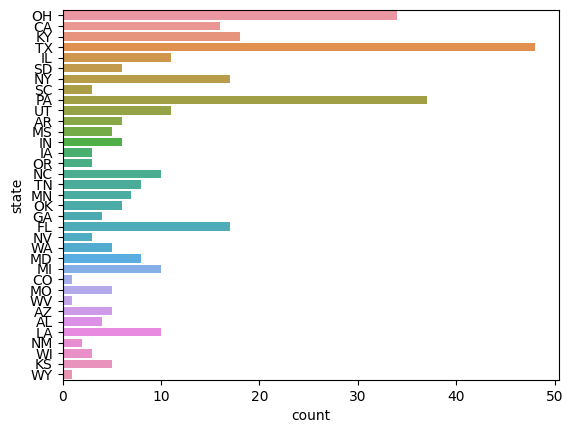

In [64]:
sns.countplot(y=train_data_wo.state)

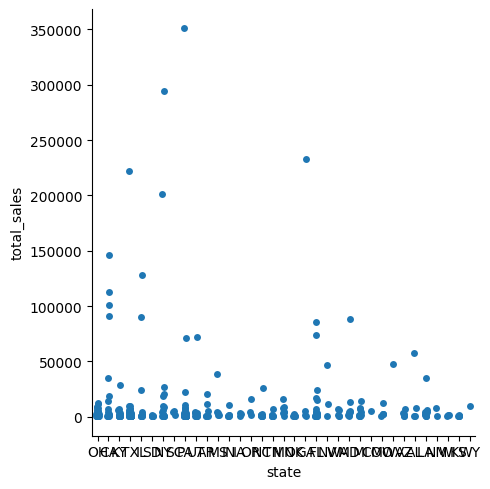

In [65]:
sns.catplot(data=train_data_wo, x='state', y='total_sales')

#### Generating X, y

In [66]:
X = np.hstack([
    bt,                          # business type
    ce,                             # city
    sl,                             # store location 
    cs,                              # credit score
    ec,                              # employee code
    st,                              # state
    age_scaled,                      # Avg Age
    # bc_scaled,                       # Blue Collar
    # wc_scaled,                       # White Collar
    # m_scaled,                        # male
    # f_scaled,                        # female
    hhi_scaled,                      # house hold income
    es_scaled,                        # employee size
    # np.array(train_data_wo.latitude).reshape(-1,1),
    # np.array(train_data_wo.longitude).reshape(-1,1)
])

In [67]:
y = ts_scaled

In [68]:
X.shape

(339, 9)

In [69]:
y.shape

(339, 1)

In [70]:
from sklearn.model_selection import train_test_split

random_state = 21
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [71]:
print(f'X_train shape:{X_train.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'X_test shape:{X_test.shape}')
print(f'y_test shape:{y_test.shape}')

X_train shape:(271, 9)
y_train shape:(271, 1)
X_test shape:(68, 9)
y_test shape:(68, 1)


#### Model building

##### Linear Model

In [72]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error
y_pred = lr_model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = mse ** 0.5
rmse

0.40144283471645004

In [83]:
np.std(y_train)

1.0934068362186615

In [84]:
rmse/np.std(y_train)

0.3671486416755572

In [74]:
lr_model.score(X_train, y_train)

0.8652018749157933

In [75]:
mse = mean_squared_error(y_test, lr_model.predict(X_test))
rmse = mse ** 0.5
rmse

0.21393650746913337

In [76]:
lr_model.score(X_test, y_test)

0.7549696509150167

##### SVR Model


In [77]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [78]:
svr = SVR()

param_grid = {
    
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [1, 10, 100, 1000],
    'epsilon':[1, 10,100, 1000]
}


search = GridSearchCV(svr, param_grid=param_grid, cv=5, verbose=1, 
                      scoring='r2')
search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [ ]:
search.best_estimator_

In [ ]:
search.best_score_

In [ ]:
search.cv_results_

In [ ]:
search.best_estimator_.score(X_train, y_train)

In [ ]:
search.best_estimator_.score(X_test, y_test)

##### Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:

params = {
    'max_depth': [5, 7, 9, 11, 15, 20],
    'min_samples_leaf' : [2, 4, 6, 8, 10, 12, 16, 18, 20], 
    'min_samples_split': [5, 8, 11, 14, 17, 20]
}

dt = DecisionTreeRegressor()
search = GridSearchCV(dt, cv=5, param_grid=params)
search.fit(X_train, y_train)

In [ ]:
search.best_estimator_

In [ ]:
search.best_score_

In [ ]:
search.best_estimator_.score(X_train, y_train)

In [ ]:
search.best_estimator_.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
params = {
    'n_estimators' :[10,20,30,40,50,60,70,80, 100],
    'max_depth': [7], #[5, 7, 9, 11, 15, 20],
    'min_samples_leaf' : [10], #[2, 4, 6, 8, 10, 12, 16, 18, 20], 
    'min_samples_split': [17], #[5, 8, 11, 14, 17, 20]
}

rf = RandomForestRegressor()
search = GridSearchCV(rf, cv=5, param_grid=params)
search.fit(X_train, y_train)


In [ ]:
search.best_estimator_

In [ ]:
search.best_score_

In [ ]:
search.best_estimator_.score(X_train, y_train)

In [ ]:
search.best_estimator_.score(X_test, y_test)

#Prediciting on test data for submission

In [ ]:
bt_test = bt_encoder.transform(test_data.business_type).reshape(-1,1)
ce_test = city_encoder.transform(test_data.city).reshape(-1,1)
sl_test = sl_encoder.transform(test_data.store_location).reshape(-1, 1) 
cs_test = cs_encoder.transform(np.array(test_data.credit_score).reshape(-1,1)).reshape(-1, 1) # credit score
ec_test = ec_encoder.transform(np.array(test_data.location_employee_code).reshape(-1,1)).reshape(-1,1)  # employee code
st_test = st_encoder.transform(test_data.state).reshape(-1, 1) # state
age_scaled_test = age_scaler.transform(np.array(test_data.avg_age).reshape(-1,1)).reshape(-1, 1)
hhi_scaled_test = hhi_scaler.transform(np.array(test_data.total_household_income).reshape(-1,1)).reshape(-1, 1) # house hold income
es_scaled_test = es_scaler.transform(np.array(test_data.employee_size).reshape(-1,1)).reshape(-1, 1)  # employee size

In [ ]:
X_sub = np.hstack([bt_test, ce_test, sl_test, cs_test, ec_test, st_test, age_scaled_test, hhi_scaled_test, es_scaled_test])
X_sub.shape

In [ ]:
y_sub_scaled = lr_model.predict(X_sub)
y_sub_scaled.shape

In [ ]:
y_sub = ts_scaler.inverse_transform(y_sub_scaled)

In [ ]:
np.hstack([y_sub_scaled, y_sub])

In [ ]:
sub = pd.DataFrame(data=np.hstack([np.array(test_data.outlet_no).reshape(-1,1), y_sub]),columns=['outlet_no', 'total_sales_actual'], dtype=np.int64)
#, column=['outlet_no', 'total_sales'])
sub.outlet_no = sub.outlet_no.astype(np.int32)
sub
sub.to_csv(f'{base_folder}/my_sub.csv', columns=['outlet_no', 'total_sales_actual'])